In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Deep learning packages
from keras.models import Sequential
from keras.layers import LSTM, Dense

#enable IPython to display matplolib graphs
%matplotlib inline


2022-03-28 10:20:47.772223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-28 10:20:47.772243: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
from ML_classes.LinearModel import LinearModel


In [3]:
df = pd.read_csv('./data/ouput.csv')
df.describe()
df["energy(kWh/hh)"] = pd.to_numeric(df["energy(kWh/hh)"], downcast="float", errors="coerce")
df.max()

LCLid                       MAC000181
tstp              2014-02-28 00:00:00
energy(kWh/hh)                  4.595
dtype: object

In [4]:
df['tstp'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df['tstp']]
#df["tstp"] = pd.to_datetime(df["tstp"])
df["energy(kWh/hh)"] = pd.to_numeric(df["energy(kWh/hh)"], downcast="float", errors="coerce")

#max_value_energy = df["energy(kWh/hh)"].max()
#df['energy(kWh/hh)'] = df['energy(kWh/hh)'].apply(lambda x: x / max_value_energy)
# Sorting the values
#df.sort_values('tstp', inplace=True)

In [5]:
#df["energy(kWh/hh)"].describe()
#df.max()
#df.describe()

In [6]:
lclid_list = df['LCLid'].unique()
def find_household(identification):
    affluenthh_filt = df["LCLid"] == identification
    affluent_hh_data = df[affluenthh_filt]
    return affluent_hh_data

hh = find_household("MAC000150")
hh.pop("LCLid")
#hh = hh.set_index("tstp")
#hh = hh.resample("H").sum()
#hh = hh.reset_index()

hh_max = hh['energy(kWh/hh)'].max()
hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)

/tmp/ipykernel_22088/194026773.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)


In [7]:
#hh["energy(kWh/hh)"].describe()
#len(hh["energy(kWh/hh)"])

In [8]:
# Initiating the class
deep_learner = LinearModel(
data = hh,
Y_var = 'energy(kWh/hh)',
lag = 48,
epochs = 50,
batch_size = 256,
train_test_split = 0.15
)

In [9]:
# Fitting the model

model = deep_learner.LinearModel()

Epoch 1/50


2022-03-28 10:20:52.735575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 10:20:52.736030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-28 10:20:52.736113: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-28 10:20:52.736189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-28 10:20:52.736262: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

132/132 [==============================] - 0s 1ms/step - loss: 0.0190 - val_loss: 0.0140
Epoch 2/50
132/132 [==============================] - 0s 808us/step - loss: 0.0107 - val_loss: 0.0099
Epoch 3/50
132/132 [==============================] - 0s 818us/step - loss: 0.0082 - val_loss: 0.0079
Epoch 4/50
132/132 [==============================] - 0s 798us/step - loss: 0.0067 - val_loss: 0.0067
Epoch 5/50
132/132 [==============================] - 0s 828us/step - loss: 0.0058 - val_loss: 0.0059
Epoch 6/50
132/132 [==============================] - 0s 870us/step - loss: 0.0052 - val_loss: 0.0054
Epoch 7/50
132/132 [==============================] - 0s 798us/step - loss: 0.0048 - val_loss: 0.0051
Epoch 8/50
132/132 [==============================] - 0s 786us/step - loss: 0.0046 - val_loss: 0.0049
Epoch 9/50
132/132 [==============================] - 0s 799us/step - loss: 0.0045 - val_loss: 0.0048
Epoch 10/50
132/132 [==============================] - 0s 791us/step - loss: 0.0044 - val_loss:

In [10]:
deep_learner.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


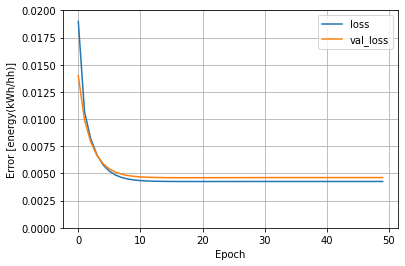

In [11]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.02])
    plt.xlabel('Epoch')
    plt.ylabel('Error [energy(kWh/hh)]')
    plt.legend()
    plt.grid(True)
plot_loss(deep_learner.history)

In [12]:
# Defining the lag that we used for training of the model 
lag_model = 48
# Getting the last period
ts = hh['energy(kWh/hh)'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = deep_learner.dc.create_X_Y(ts, lag=lag_model)
# Getting the forecast
yhat = model.predict(X)

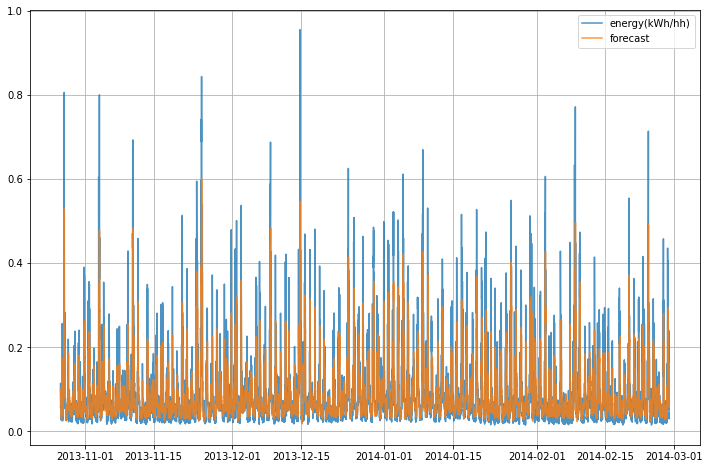

In [13]:
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = hh.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['energy(kWh/hh)', 'forecast']:
  plt.plot(
    'tstp',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()

/tmp/ipykernel_22088/2078647226.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc = fc.append(hat_frame)


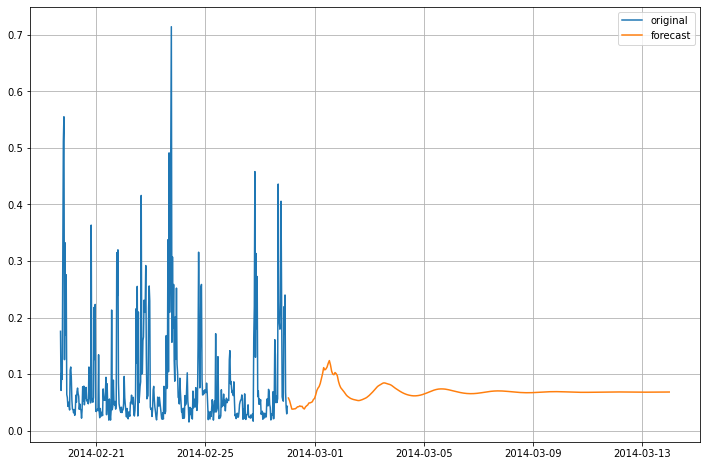

In [14]:

#Forecasting n steps ahead
n_ahead = 168*2
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

#Constructing the forecast dataframe
fc = hh.tail(400).copy() 
fc['type'] = 'original'

last_date = max(fc['tstp'])
hat_frame = pd.DataFrame({
    'tstp': [last_date + timedelta(hours=x + 1) for x in range(n_ahead)], 
    'energy(kWh/hh)': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)
#Ploting the forecasts 
plt.figure(figsize=(12, 8))
for col_type in ['original', 'forecast']:
    plt.plot(
        'tstp', 
        'energy(kWh/hh)', 
        data=fc[fc['type']==col_type],
        label=col_type
        )

plt.legend()
plt.grid()   

In [15]:
deep_learner.evaluateMSE()

0.004617995340282977

In [16]:
deep_learner.evaluateRMSE()

0.06795583374724334

In [17]:
deep_learner.evaluateMAE()

0.03641167083620496

In [18]:
deep_learner.evaluateMAPE()

44.81903057123777

In [19]:
yhat =deep_learner.predict()

In [20]:
#train for all houses
lclid_list = df['LCLid'].unique().tolist()
#print(type(lclid_list))
mse = []
rmse = []
mae = []
mape = []
for lclid in lclid_list:
    #print(lclid)


    hh = find_household(lclid)
    hh.pop("LCLid")
    hh = hh.set_index("tstp")
    hh = hh.resample("H").sum()
    hh = hh.reset_index()

    hh_max = hh['energy(kWh/hh)'].max()
    hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)
    
    # Initiating the class
    deep_learner = LinearModel(
    data = hh,
    Y_var = 'energy(kWh/hh)',
    lag = 48,
    epochs = 30,
    batch_size = 256,
    train_test_split = 0.15
    )
    #training
    model = deep_learner.LinearModel()
    
    mse.append(deep_learner.evaluateMSE())
    rmse.append(deep_learner.evaluateRMSE())
    mae.append(deep_learner.evaluateMAE())
    mape.append(deep_learner.evaluateMAPE())
houses = pd.Series(data=lclid_list,name="lclid")
mse = pd.Series(data=mse,name="mse")
rmse = pd.Series(data=rmse,name="rmse")
mae = pd.Series(data=mae,name="mae")
mape = pd.Series(data=mape,name="mape")

res_df = pd.merge(houses, mse, right_index=True, left_index=True)
res_df["rmse"] = rmse
res_df["mae"] = mae
res_df["mape"] = mape



Epoch 1/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.0168
Epoch 2/30
66/66 [==============================] - 0s 926us/step - loss: 0.0090 - val_loss: 0.0144
Epoch 3/30
66/66 [==============================] - 0s 909us/step - loss: 0.0078 - val_loss: 0.0126
Epoch 4/30
66/66 [==============================] - 0s 908us/step - loss: 0.0067 - val_loss: 0.0111
Epoch 5/30
66/66 [==============================] - 0s 936us/step - loss: 0.0059 - val_loss: 0.0099
Epoch 6/30
66/66 [==============================] - 0s 905us/step - loss: 0.0052 - val_loss: 0.0089
Epoch 7/30
66/66 [==============================] - 0s 918us/step - loss: 0.0047 - val_loss: 0.0082
Epoch 8/30
66/66 [==============================] - 0s 979us/step - loss: 0.0043 - val_loss: 0.0076
Epoch 9/30
66/66 [==============================] - 0s 926us/step - loss: 0.0039 - val_loss: 0.0071
Epoch 10/30
66/66 [==============================] - 0s 901us/step - loss: 0.0037 - val_loss: 0.0067
E

66/66 [==============================] - 0s 892us/step - loss: 0.0048 - val_loss: 0.0041
Epoch 23/30
66/66 [==============================] - 0s 918us/step - loss: 0.0048 - val_loss: 0.0041
Epoch 24/30
66/66 [==============================] - 0s 925us/step - loss: 0.0048 - val_loss: 0.0041
Epoch 25/30
66/66 [==============================] - 0s 885us/step - loss: 0.0048 - val_loss: 0.0041
Epoch 26/30
66/66 [==============================] - 0s 910us/step - loss: 0.0048 - val_loss: 0.0041
Epoch 27/30
66/66 [==============================] - 0s 891us/step - loss: 0.0048 - val_loss: 0.0041
Epoch 28/30
66/66 [==============================] - 0s 907us/step - loss: 0.0047 - val_loss: 0.0040
Epoch 29/30
66/66 [==============================] - 0s 944us/step - loss: 0.0047 - val_loss: 0.0040
Epoch 30/30
66/66 [==============================] - 0s 901us/step - loss: 0.0047 - val_loss: 0.0040
Epoch 1/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0095
Epoch

66/66 [==============================] - 0s 901us/step - loss: 0.0138 - val_loss: 0.0160
Epoch 14/30
66/66 [==============================] - 0s 925us/step - loss: 0.0131 - val_loss: 0.0152
Epoch 15/30
66/66 [==============================] - 0s 996us/step - loss: 0.0125 - val_loss: 0.0145
Epoch 16/30
66/66 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0139
Epoch 17/30
66/66 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0133
Epoch 18/30
66/66 [==============================] - 0s 930us/step - loss: 0.0109 - val_loss: 0.0128
Epoch 19/30
66/66 [==============================] - 0s 950us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 20/30
66/66 [==============================] - 0s 978us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 21/30
66/66 [==============================] - 0s 922us/step - loss: 0.0098 - val_loss: 0.0115
Epoch 22/30
66/66 [==============================] - 0s 925us/step - loss: 0.0095 - val_loss: 0.0112
Epoch 

66/66 [==============================] - 0s 957us/step - loss: 0.0205 - val_loss: 0.0096
Epoch 6/30
66/66 [==============================] - 0s 952us/step - loss: 0.0185 - val_loss: 0.0093
Epoch 7/30
66/66 [==============================] - 0s 899us/step - loss: 0.0174 - val_loss: 0.0090
Epoch 8/30
66/66 [==============================] - 0s 907us/step - loss: 0.0165 - val_loss: 0.0087
Epoch 9/30
66/66 [==============================] - 0s 895us/step - loss: 0.0158 - val_loss: 0.0085
Epoch 10/30
66/66 [==============================] - 0s 871us/step - loss: 0.0152 - val_loss: 0.0082
Epoch 11/30
66/66 [==============================] - 0s 930us/step - loss: 0.0146 - val_loss: 0.0079
Epoch 12/30
66/66 [==============================] - 0s 880us/step - loss: 0.0140 - val_loss: 0.0076
Epoch 13/30
66/66 [==============================] - 0s 929us/step - loss: 0.0135 - val_loss: 0.0074
Epoch 14/30
66/66 [==============================] - 0s 976us/step - loss: 0.0129 - val_loss: 0.0071
Epoch 

In [21]:
res_df

,lclid,mse,rmse,mae,mape
0,MAC000168,0.004865,0.069751,0.033249,130.396372
1,MAC000169,0.004456,0.066756,0.039819,49.089015
2,MAC000179,0.004032,0.063500,0.035741,43.544754
3,MAC000181,0.003204,0.056603,0.028152,36.288376
4,MAC000165,0.006876,0.082923,0.053506,31.154511
5,MAC000173,0.009641,0.098187,0.064605,45.166533
6,MAC000152,0.007371,0.085854,0.046913,76.283177
7,MAC000153,0.007190,0.084795,0.060950,45.202599
8,MAC000159,0.004691,0.068494,0.046368,45.974887
9,MAC000150,0.005365,0.073247,0.042700,43.444197
